# Assignment 1: Test the z-test

**Usual imports**

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import scipy as sp
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Generating a seed for reproducibility**

In [2]:
np.random.seed(999)

## Poisson Distrubution

Mean: $\mu = \lambda$

Variance: $\sigma^2 = \lambda$

Standard deviation: $\sigma = \sqrt{\lambda}$

In [3]:
# decision about population
mymean = 800.
mystdev = np.sqrt(mymean)
Nsamples = 200
Nit = 1000

myDmean = np.zeros(Nit)

for i in range(Nit):
    mydist = np.random.poisson(lam=mymean, size=Nsamples)
    myDmean[i] = mydist.mean()

# $z = \frac{\mu_{pop} - \mu_{sample}}{\frac{\sigma}{\sqrt{N}}}$

Text(0,0.5,'Frequency')

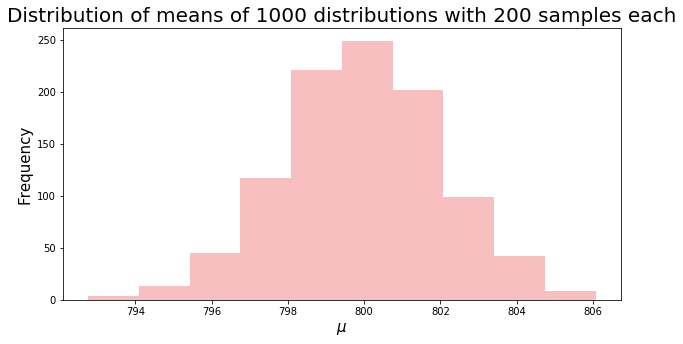

In [4]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(myDmean, color='lightcoral', alpha=0.5)
ax.set_title("Distribution of means of 1000 distributions with 200 samples each", fontsize=20)
ax.set_xlabel("$\mu$", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)

### Figure 1. Distribution of the means
This shows the distribution of the means of the 1000 Poisson distributions with 200 samples each. As you can see, it looks very similar to a Gaussian distribution, aside from it being centered on the given mean instead of 0.

In [5]:
zs = (mymean - myDmean) * np.sqrt(Nsamples) / np.sqrt(mymean)

Text(0,0.5,'frequency')

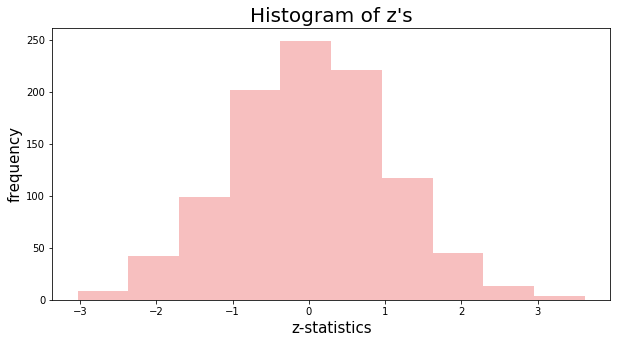

In [6]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(zs, color='lightcoral', alpha=0.5)
ax.set_title("Histogram of z's", fontsize=20)
ax.set_xlabel("z-statistics", fontsize=15)
ax.set_ylabel("frequency", fontsize=15)

### Figure 2. Distribution of the z-statistics
This figure of the distribution of the z-statistics of the Poisson distribution also looks like a Gaussian distribution with it centered at 0.

## Null Hypothesis: The distribution of the z-statistics is consistent with a Gaussian distribution ($N(0,1)$)

## $\alpha = 0.05$

In [7]:
ks = sp.stats.kstest(zs, 'norm')
ks

KstestResult(statistic=0.023463031122761158, pvalue=0.64070379211737916)

Since the p-value of the KS Test result is 0.64 which is greater than our significance level 0.05, we cannot reject the null hypothesis that the distribution of the z-statistics of the Poisson distribution is consistent with a Gaussian distribution.

**Meaning the distribution of the z-statistics comes from a Gaussian distribution.**

In [8]:
ad = sp.stats.anderson(zs, 'norm')
ad

AndersonResult(statistic=0.19403104879404509, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Based on the scipy.stats.anderson documentation
> If A2 is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.

In this case, the critical value for our significance level is 0.784.

Our statistic is at 0.194 which is less than 0.784, which means we **CANNOT** reject the null hypothesis that the data comes from a normal distribution.

**Meaning the distribution of the z-statistics comes from a Gaussian distribution.**

## Binomial distribution

Mean: $\mu = np$

Variance: $\sigma^2 = np(1-p)$

Standard deviation: $\sigma = \sqrt{np(1-p)}$

In [9]:
np.random.seed(999)

In [10]:
p = 0.5
n = mymean/p
mystdev = np.sqrt(n*p*(1-p))

myBiMean = np.zeros(Nit)

for i in range(Nit):
    myBiDist = np.random.binomial(n, p, size=Nsamples)
    myBiMean[i] = myBiDist.mean()

Text(0,0.5,'Frequency')

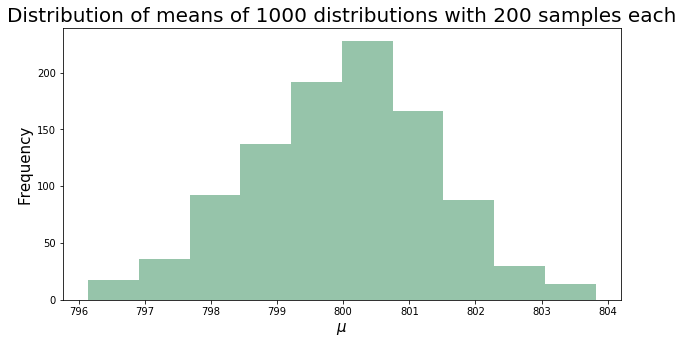

In [11]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(myBiMean, color='seagreen', alpha=0.5)
ax.set_title("Distribution of means of 1000 distributions with 200 samples each", fontsize=20)
ax.set_xlabel("$\mu$", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)

### Figure 3. Distribution of means of Binomial Distribution
This is the distribution of the means of the 1000 200-sample Binomial distrubutions and as you can see it looks quite similar to a normal distribution except that it is not centered at 0.

In [12]:
zBi = (mymean - myBiMean) * np.sqrt(Nsamples) / mystdev

Text(0,0.5,'frequency')

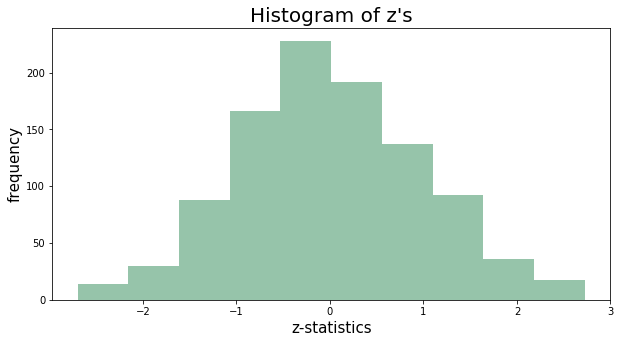

In [13]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(zBi, color='seagreen', alpha=0.5)
ax.set_title("Histogram of z's", fontsize=20)
ax.set_xlabel("z-statistics", fontsize=15)
ax.set_ylabel("frequency", fontsize=15)

### Figure 4. Distribution of z-statistics of the Binomial distribution
The distribution of the z-statistics of the binomial distribution also looks similar to a normal distribution with mean 0 and standard deviation of 1.

In [14]:
ksBi = sp.stats.kstest(zBi, 'norm')
ksBi

KstestResult(statistic=0.024898199307421431, pvalue=0.56485436796000832)

Working with the same null hypothesis from above, we **CANNOT REJECT** the null hypothesis because the p-value of the KS test is 0.56 and that is higher than our $\alpha$ of 0.05. 

**Meaning the distribution of the z-statistics of the binomial distributions with a high mean (in this case, 800) can be said to come from a normal/Gaussian distribution.**

In [15]:
adBi = sp.stats.anderson(zBi, 'norm')
adBi

AndersonResult(statistic=0.53226648373606622, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Similarly, in this Anderson-Darling test, the statistic returned is 0.532 which is lower than the critical value for our $\alpha$ of 5%, which is at 0.784. Based on this, we also **CANNOT REJECT** the null hypothesis.

**Meaning the distribution of the z-statistics of the binomial distributions with a high mean (in this case, 800) can be said to come from a normal/Gaussian distribution.**